# Scripts

In [3]:
import numpy as np
import dom

Plot settings:

In [4]:
import matplotlib
%matplotlib inline
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['xtick.top'] = True
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.right'] = True
matplotlib.rcParams['ytick.direction'] = 'in'
import matplotlib.pyplot as plt
matplotlib.rcParams['font.size'] = 34
matplotlib.rcParams['lines.linewidth'] = 4
matplotlib.rcParams['patch.linewidth'] = 3
matplotlib.rcParams['axes.linewidth'] = 2
matplotlib.rcParams['xtick.major.size'] = 15
matplotlib.rcParams['xtick.major.width'] = 2
matplotlib.rcParams['ytick.major.size'] = 15
matplotlib.rcParams['ytick.major.width'] = 2
from matplotlib.patches import ConnectionPatch

## Constant density of modes

In [2]:
from equation import solve4beta
const_opt = solve4beta(dom.const)
# np.savetxt('const_dom.csv', const_opt, delimiter=',')

plot

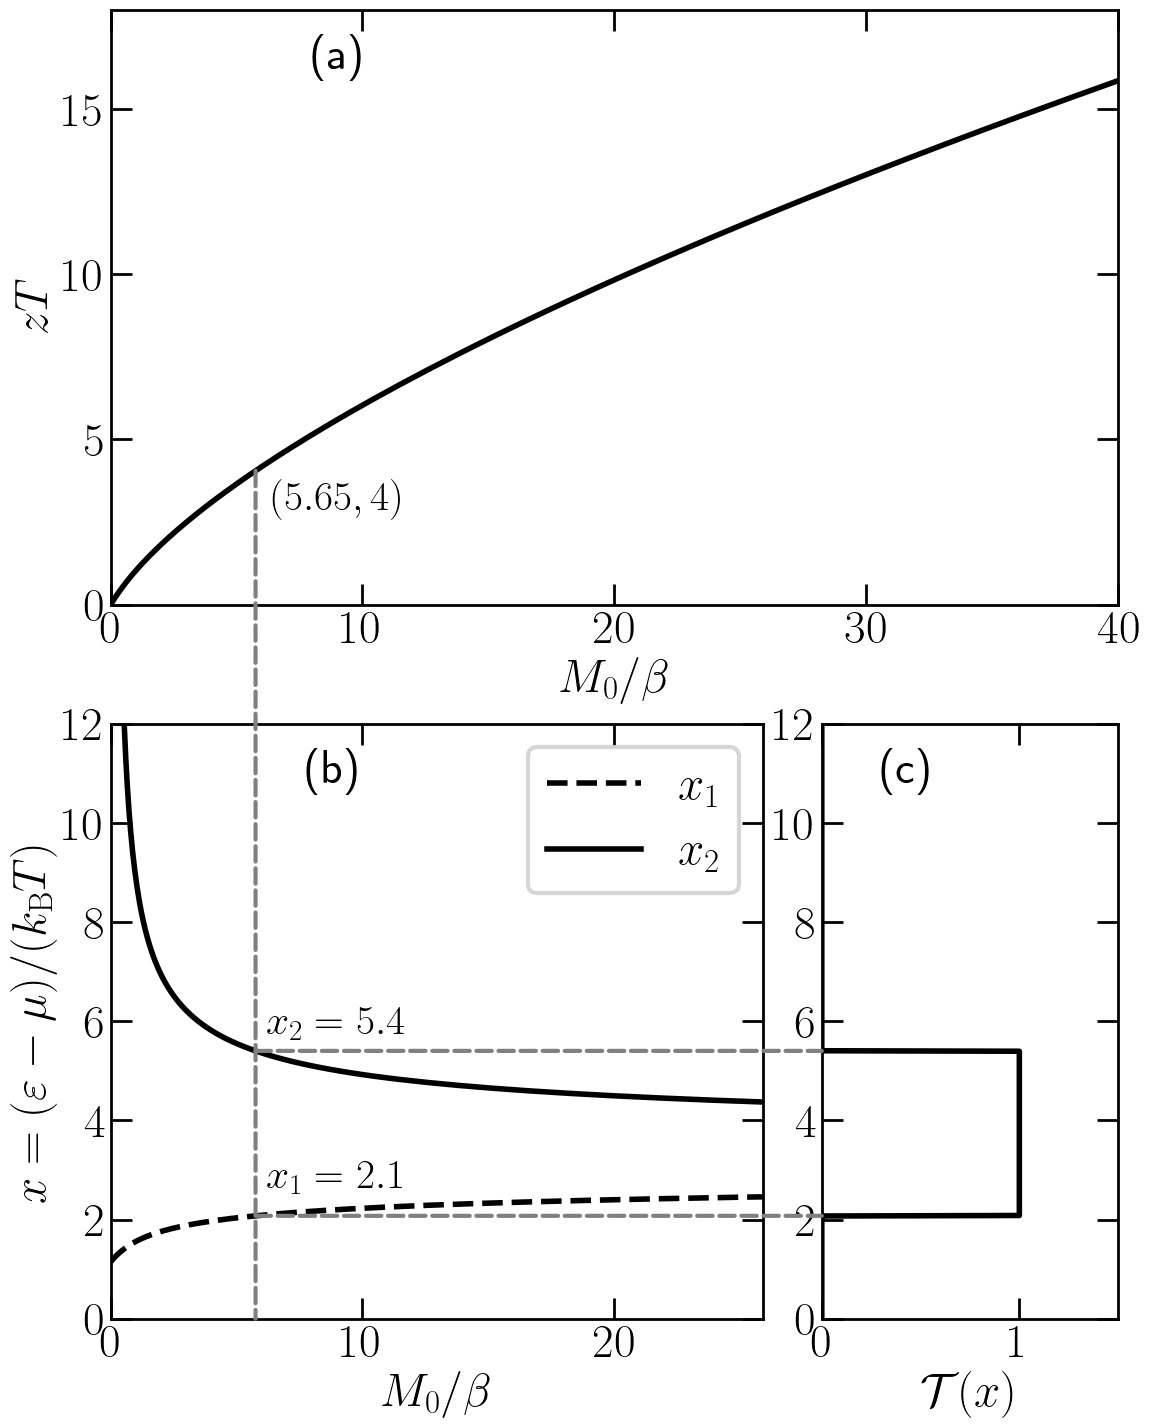

In [3]:
data = np.loadtxt('const_dom.csv',delimiter=',')
fig = plt.figure(figsize=(13, 17))
ax1 = plt.subplot2grid((2,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((2,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((2,3), (1,2))
ax1.plot(data[:,0], data[:,3], 'k')
ax1.set_xlim(0.,40.)
ax1.set_xlabel(r"$M_0/\beta$")
ax1.set_ylabel(r'$zT$')
ax1.set_ylim(0,18)
ax1.text(0.2, 0.9, '(a)',transform=ax1.transAxes)
ax1.text(0.16, 0.16, r"$(5.65,4)$",transform=ax1.transAxes, fontdict={'size':30})
ax2.plot(data[:,0],data[:,1], 'k--',label=r'$x_1$')
ax2.plot(data[:,0],data[:,2], 'k', label=r'$x_2$')
ax2.legend()
ax2.set_xlim(0, ax1.transData.inverted().transform([ax2.transAxes.transform([1,0])[0],0])[0])
# ax2.set_xticks([0,5,10,15])
ax2.set_xlabel(r"$M_0/\beta$")
ax2.set_ylim(0,12)
ax2.set_ylabel(r'$x=(\varepsilon-\mu)/(k_\mathrm{B}T)$')
ax2.text(0.3, 0.9, '(b)',transform=ax2.transAxes)
ax2.text(0.24, 0.48, r"$x_2=5.4$",transform=ax2.transAxes, fontdict={'size':30})
ax2.text(0.24, 0.22, r"$x_1=2.1$",transform=ax2.transAxes, fontdict={'size':30})
basepoint = data[188]
boxy = np.linspace(0,12,num=1200)
boxx = list(map(lambda y: 1 if y else 0, (boxy > basepoint[1]) & (boxy < basepoint[2])))
ax3.plot(boxx, boxy, 'k')
ax3.set_xlim(0, 1.5)
ax3.set_xticks([0,1])
ax3.set_xlabel(r'$\mathcal{T}(x)$')
ax3.set_ylim(0,12)
ax3.text(0.2, 0.9, '(c)',transform=ax3.transAxes)
fig.add_artist(ConnectionPatch(xyA=(basepoint[0],basepoint[3]), xyB=(basepoint[0],0), coordsA='data', coordsB='data', axesA=ax1, axesB=ax2, color='grey', ls='--'))
fig.add_artist(ConnectionPatch(xyA=(basepoint[0],basepoint[1]), xyB=(0,basepoint[1]), coordsA='data', coordsB='data', axesA=ax2, axesB=ax3, color='grey', ls='--'))
fig.add_artist(ConnectionPatch(xyA=(basepoint[0],basepoint[2]), xyB=(0,basepoint[2]), coordsA='data', coordsB='data', axesA=ax2, axesB=ax3, color='grey', ls='--'))

## DoM of TIs

In [8]:
from equation import solve4beta
def ti_opt(mu, vw, gap, cw):
    dom_ti = lambda x: dom.ti(x, mu, vw, gap, cw)
    opt_win = solve4beta(dom_ti, guess=[2,4])
    _, (ax1, ax2) = plt.subplots(2,1, figsize=(13, 17))
    x_range = np.linspace(-10,10,500)
    ax1.plot(x_range, dom_ti(x_range))
    ax1.set_xlabel('$x$')
    ax1.set_ylabel('$M$')
    ax1.set_xlim(-10,10)
    ax1.set_ylim(0,10)
    ax2.plot(opt_win[:,0], opt_win[:,1], label=r'$x_1$')
    ax2.plot(opt_win[:,0], opt_win[:,2], label=r'$x_2$')
    ax2.legend()
    ax2.set_xlabel(r'$1/\beta$')
    ax2.set_ylabel('$x$')
    ax2.set_xlim(0, 30)
    ax2.set_ylim(0, 12)

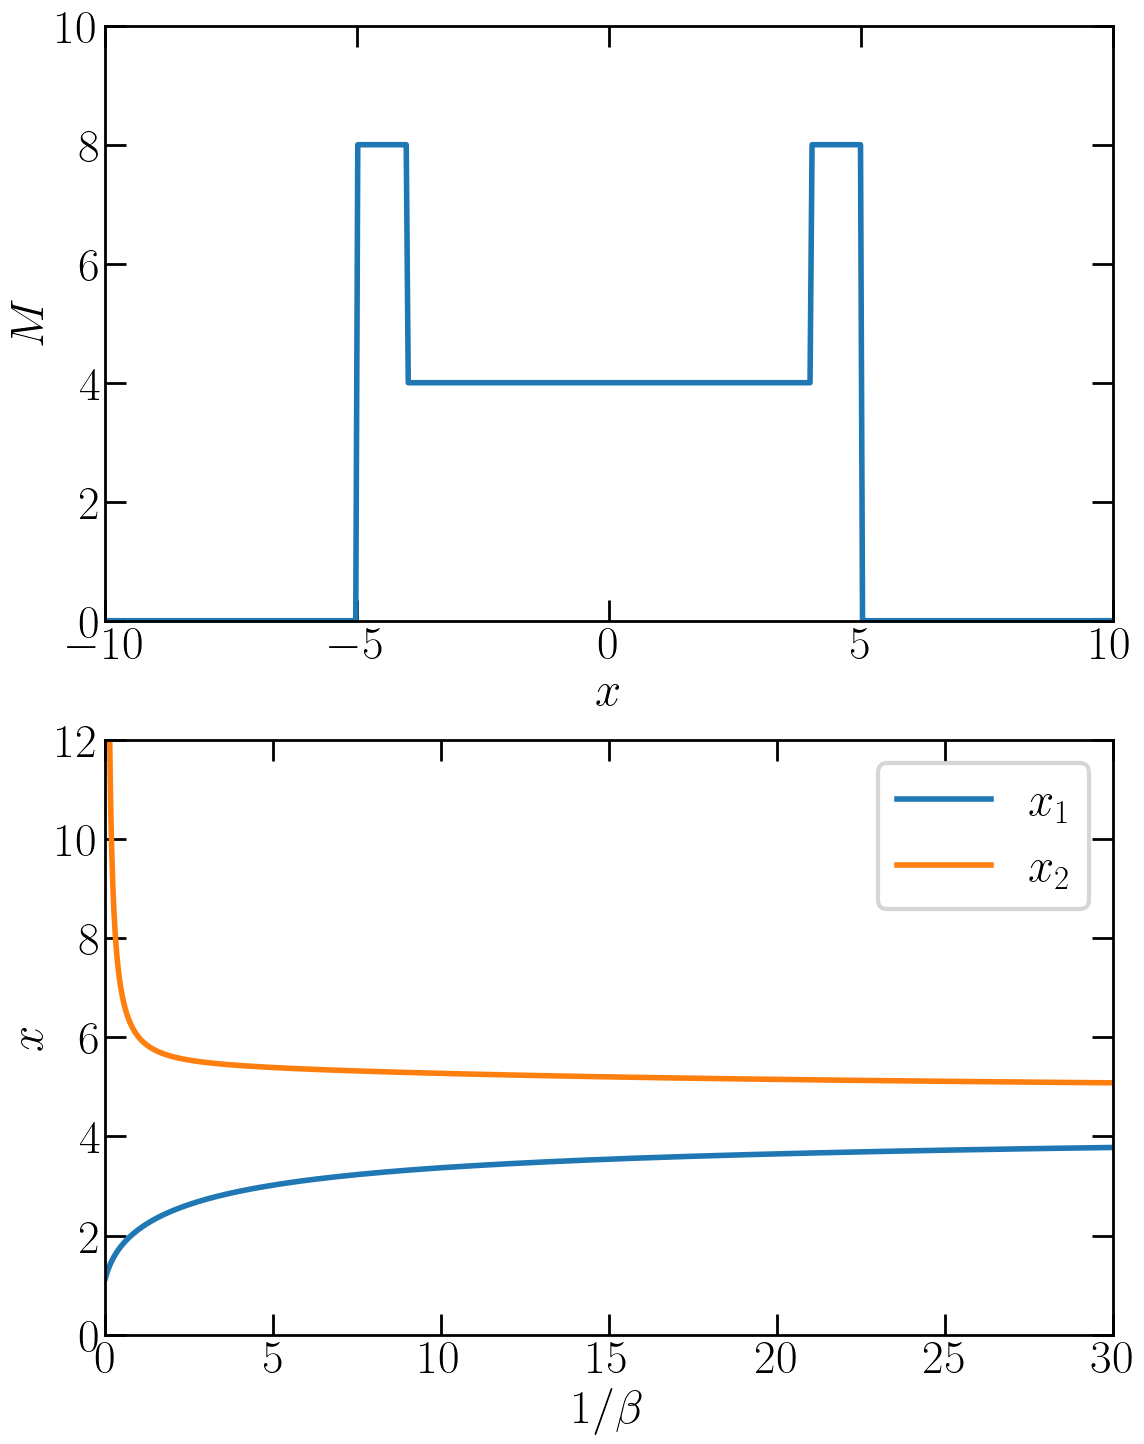

In [11]:
ti_opt(0,1,8,1)

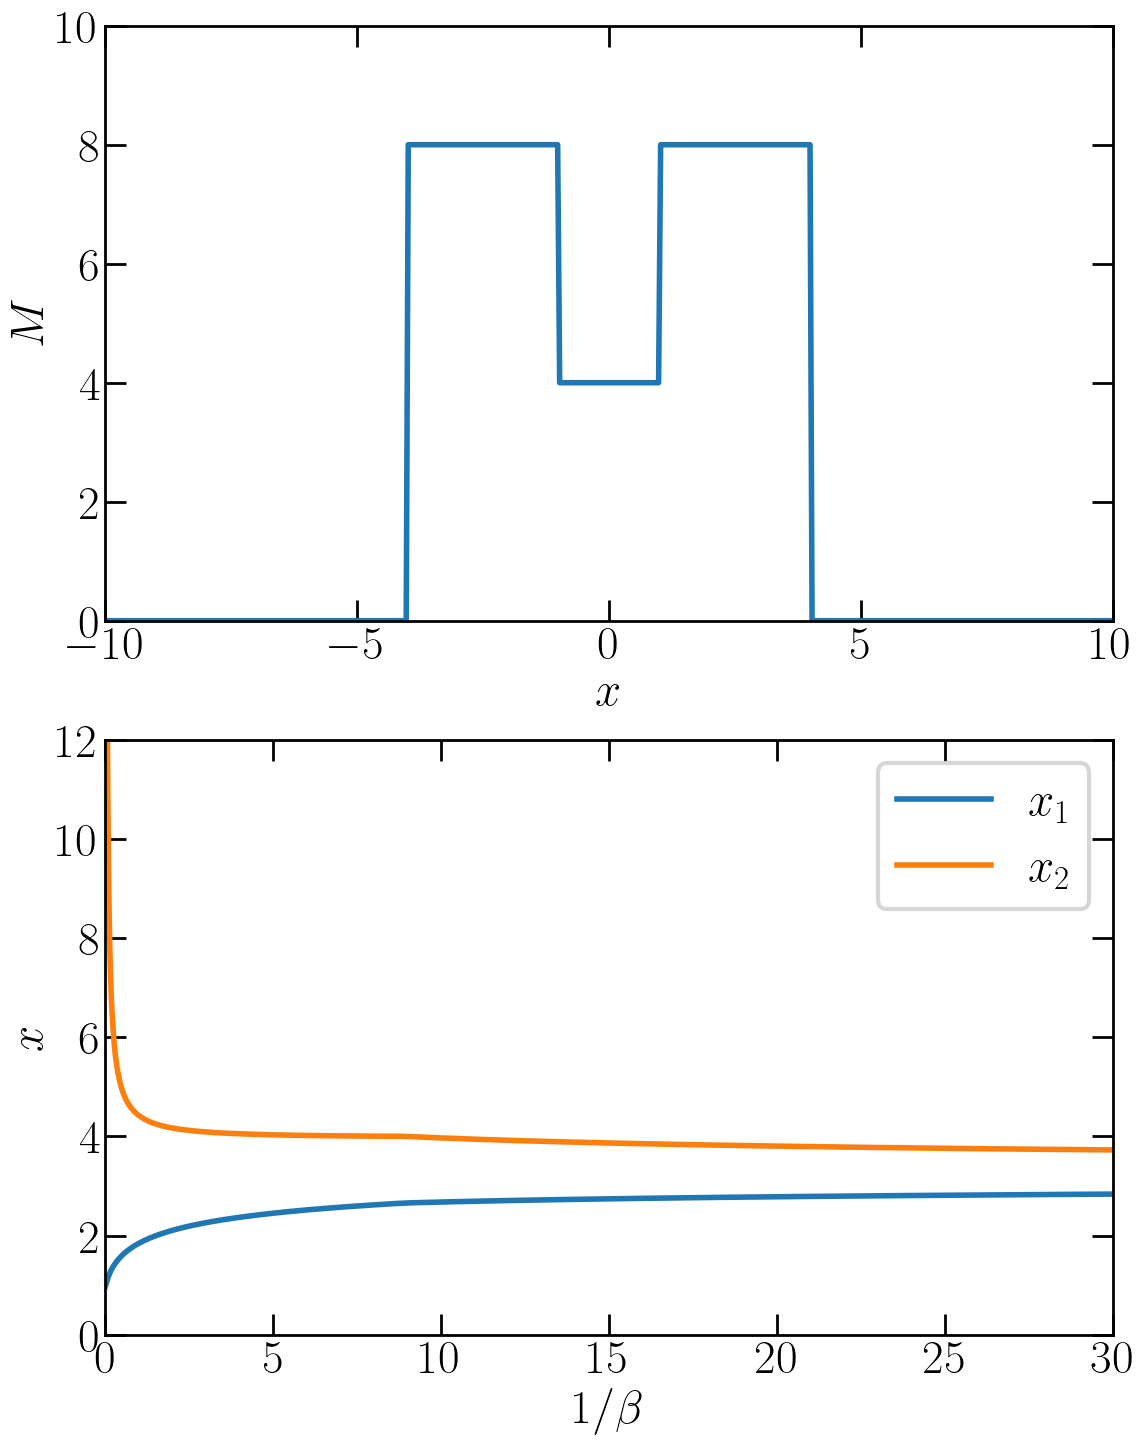

In [9]:
ti_opt(0,3,2,3)

## DoM of Basin

In [1]:
from equation import solve4beta
def basin_opt(mu, gap):
    dom_basin = lambda x: dom.basin(x, mu, gap)
    opt_win = solve4beta(dom_basin, guess=[2,4])
    _, (ax1, ax2) = plt.subplots(2,1, figsize=(13, 17))
    x_range = np.linspace(-10,10,500)
    ax1.plot(x_range, dom_basin(x_range))
    ax1.set_xlabel('$x$')
    ax1.set_ylabel('$M$')
    ax1.set_xlim(-10,10)
    ax1.set_ylim(0,10)
    ax2.plot(opt_win[:,0], opt_win[:,1], label=r'$x_1$')
    ax2.plot(opt_win[:,0], opt_win[:,2], label=r'$x_2$')
    ax2.legend()
    ax2.set_xlabel(r'$1/\beta$')
    ax2.set_ylabel('$x$')
    ax2.set_xlim(0, 30)
    ax2.set_ylim(0, 12)

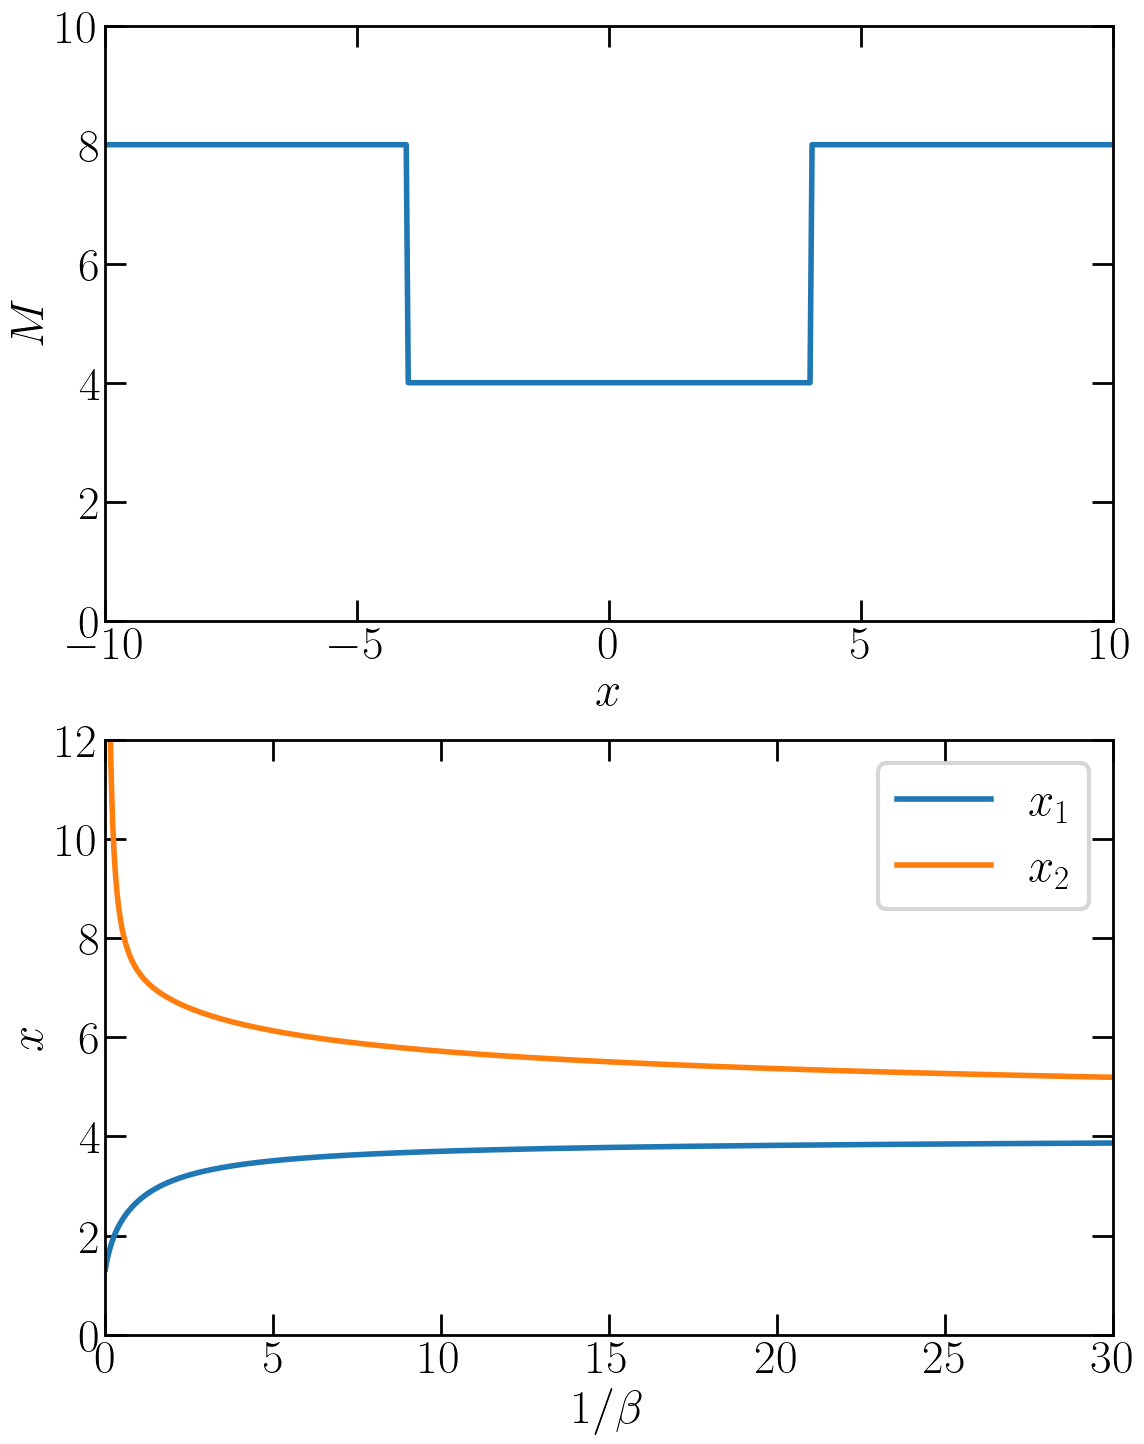

In [7]:
basin_opt(0, 8)

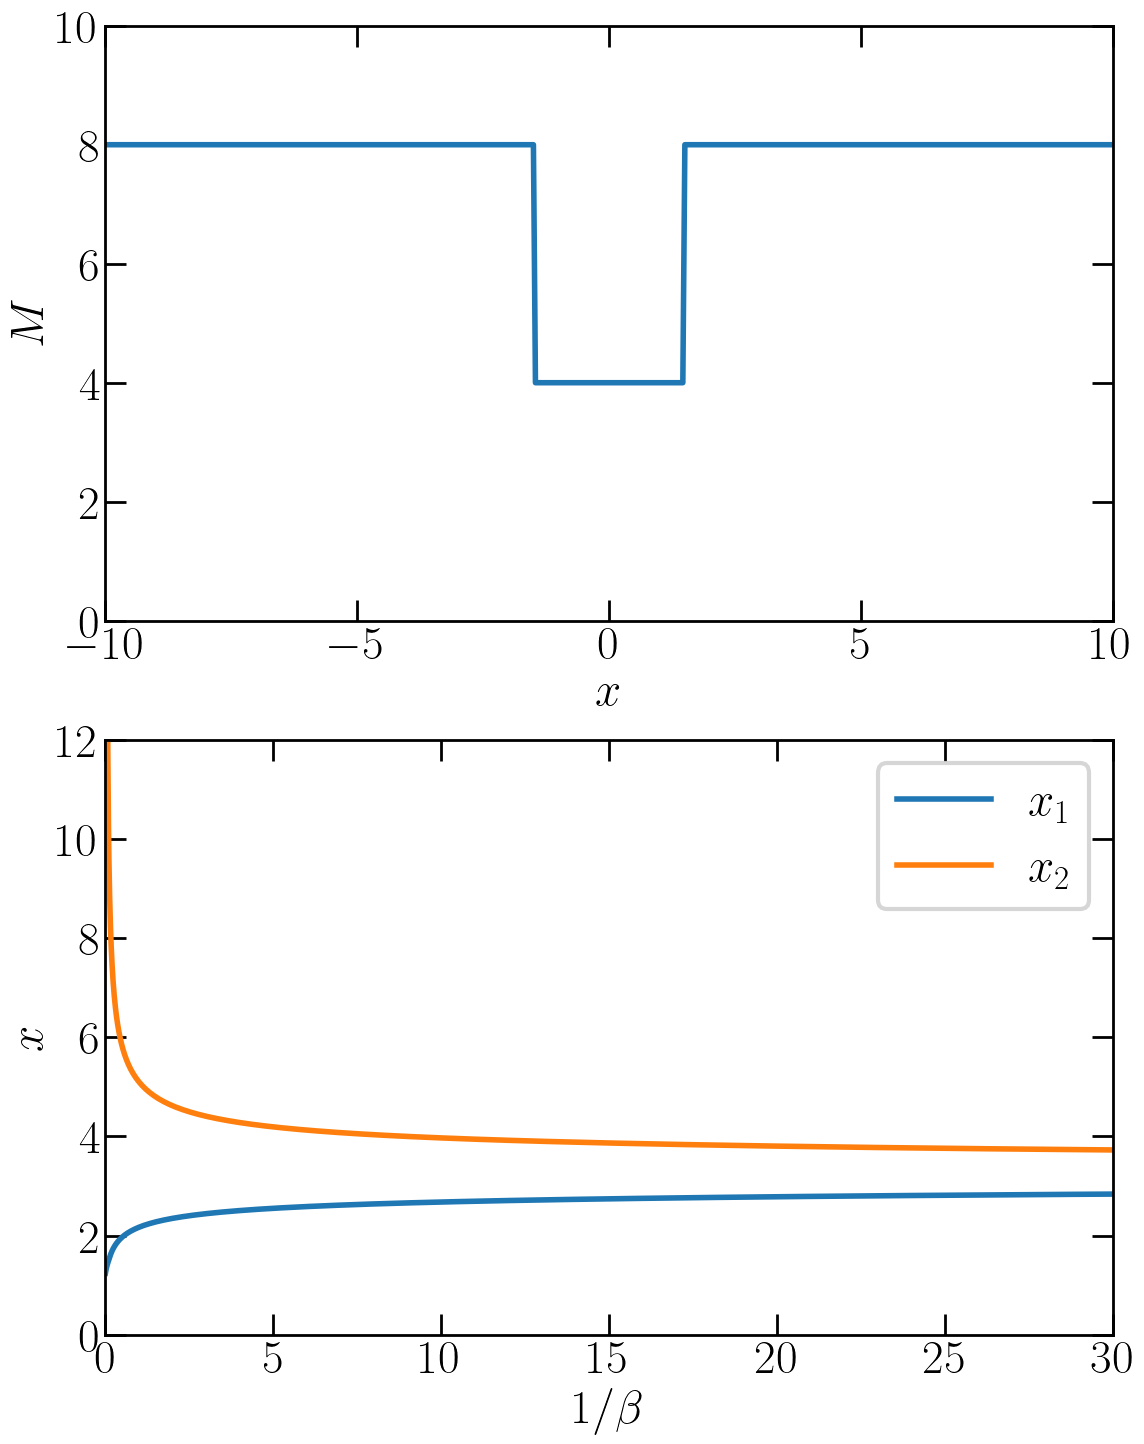

In [6]:
basin_opt(0, 3)